<a href="https://colab.research.google.com/github/Pratyush-3003/CLTV/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00


***Importing Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Importing Lifetime Models***

In [3]:
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.utils import summary_data_from_transaction_data, calibration_and_holdout_data

***Loading The Data-Set***

In [4]:
df = pd.read_csv('MiPData.csv', encoding='latin-1')
print(df.info())
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED 

***Data Preprocessing***

*Missing Data*

In [5]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Description      1454
CustomerID     135080
dtype: int64


In [6]:
df.dropna(inplace=True)
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


*Duplicate Rows*

In [7]:
duplicate_values= df.duplicated().sum()
print(duplicate_values)
df.drop_duplicates(inplace=True)
print(duplicate_values)

5225
5225


*Checking and Converting Data-Types*

In [8]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M',errors='coerce')
df['CustomerID'] = df['CustomerID'].astype(int)

Removing negative and Non-zeros Quantities

In [10]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice']> 0]
print (df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0              

**Total Price**

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  

***Feature Engineering (RFM Metrics)***

In [12]:
sanpshot_date = df['InvoiceDate'].max()
summary =summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', 'TotalPrice')
print(summary.head())

print(sanpshot_date)

            frequency  recency      T  monetary_value
CustomerID                                           
12346             0.0      0.0  316.0            0.00
12347             1.0    278.0  308.0         1294.32
12348             2.0    283.0  349.0          268.72
12349             0.0      0.0    9.0            0.00
12352             4.0    224.0  287.0          228.29
2011-11-30 17:37:00


***Exploratory Data Analysis (EDA)***

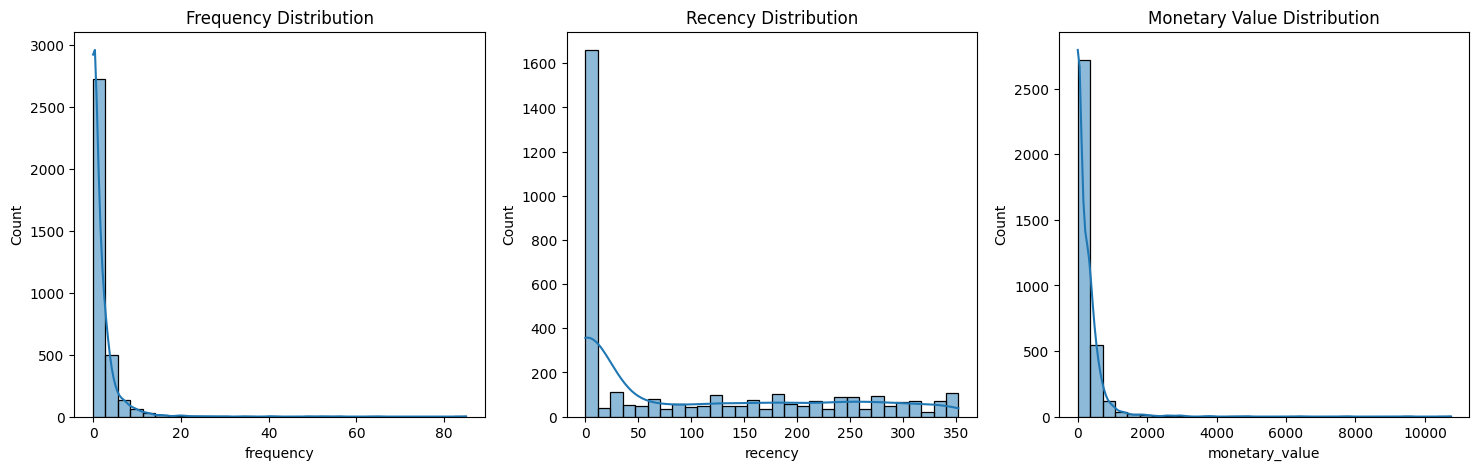

In [13]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(summary['frequency'], ax=axes[0], bins=30, kde=True)
axes[0].set_title('Frequency Distribution')
sns.histplot(summary['recency'], ax=axes[1], bins=30, kde=True)
axes[1].set_title('Recency Distribution')
sns.histplot(summary['monetary_value'], ax=axes[2], bins=30, kde=True)
axes[2].set_title('Monetary Value Distribution')
plt.show()


***ML Model for Predicting Number of Purchases (Over next 90 days)***


In [14]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'],summary['recency'],summary['T'])
t = 90
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']).round(0).astype(int)
print(summary[['predicted_purchases']])

            predicted_purchases
CustomerID                     
12346                         0
12347                         0
12348                         1
12349                         1
12352                         1
...                         ...
18273                         0
18276                         1
18278                         0
18283                         2
18287                         1

[3480 rows x 1 columns]


***ML Model for predicting Monetary Value***

In [21]:
ggf = GammaGammaFitter(penalizer_coef=0)
ggf.fit(summary['frequency'][summary['frequency'] > 0], summary['monetary_value'][summary['frequency'] > 0])
summary['predicted_monetary'] = ggf.conditional_expected_average_profit(summary['frequency'], summary['monetary_value'])
print(summary[['predicted_monetary']].head())

            predicted_monetary
CustomerID                    
12346               434.965799
12347               843.454898
12348               327.839632
12349               434.965799
12352               272.985867


***Predicting CLTV (Over Next 24 months)***

                    CLV
CustomerID             
12346        657.058927
12347       2790.495122
12348       1512.051111
12349       2521.204903
12352       2479.020948


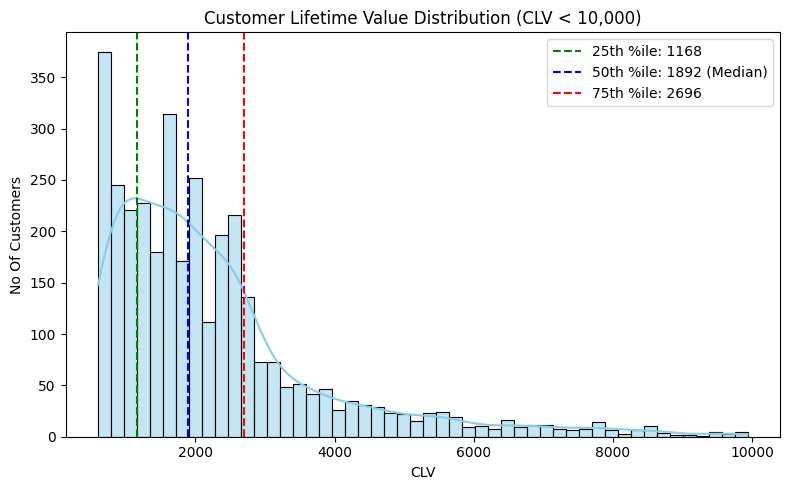

In [26]:
clv = ggf.customer_lifetime_value(bgf,summary['frequency'],summary['recency'],summary['T'],summary['monetary_value'],time=24,discount_rate=0.00  )
summary['CLV'] = clv
print(summary[['CLV']].head())
clv_filtered = summary[summary['CLV'] < 10000]['CLV']
p25, p50, p75 = np.percentile(clv_filtered, [25, 50, 75])
plt.figure(figsize=(8, 5))
sns.histplot(clv_filtered, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.axvline(p25, color='green', linestyle='--', label=f'25th %ile: {p25:.0f}')
plt.axvline(p50, color='blue', linestyle='--', label=f'50th %ile: {p50:.0f} (Median)')
plt.axvline(p75, color='red', linestyle='--', label=f'75th %ile: {p75:.0f}')
plt.title('Customer Lifetime Value Distribution (CLV < 10,000)')
plt.xlabel('CLV')
plt.ylabel('No Of Customers')
plt.legend()
plt.tight_layout()
plt.show()